In [1]:
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

# Feature Selection Methods

The [sklearn.feature_selection](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection) module implements various feature selection algorithms. 

It currently includes univariate filter selection methods and the recursive feature elimination algorithm

https://scikit-learn.org/stable/modules/feature_selection.html#feature-selection

## Prepare the data - Titanic Dataset

In [7]:
# load the dataset, using PassengerId as index
df_train = pd.read_csv("../../datasets/Titanic/train.csv", index_col='PassengerId')
df_train.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


### Data variable descriptions:
<pre>
survival        Survival
                (0 = No; 1 = Yes)
pclass          Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd)
name            Name
sex             Sex
age             Age
sibsp           Number of Siblings/Spouses Aboard
parch           Number of Parents/Children Aboard
ticket          Ticket Number
fare            Passenger Fare
cabin           Cabin
embarked        Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton)

SPECIAL NOTES:
Pclass is a proxy for socio-economic status (SES)
 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

Age is in Years; Fractional if Age less than One (1)
 If the Age is Estimated, it is in the form xx.5
</pre>

### Deal with NaN values

In [12]:
df_train.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

We have NaN values, which we fill with some proper values, after getting some insight.

In [16]:
# check what are the unique values in Cabin:
print(df_train.Cabin.unique())

# check what are the unique values in Age:
print(df_train.Age.unique())

# check what are the unique values in Age:
print(df_train.Age.unique())

[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50'
 'B42' 'C148']
[22.   38.   26.   35.     nan 54.    2.   

In [146]:
def fill_nan_values(df):
    # Put pouniqueouthampton for 'Embarked' null values:
    df["Embarked"] = df["Embarked"].fillna("S")
    
    # put the mean passengers age for 'Age' null values
    df["Age"] = df["Age"].fillna(df["Age"].median())
    
    # put 0 for cabin number for all 'Cabin' null values
    df["Cabin"] = df["Cabin"].fillna(0)
    
    # put the mean Fare for 'fare' null values:
    df["Fare"] = df["Fare"].fillna(df["Fare"].median())
    
    return df

df_train = fill_nan_values(df_train)

### Categorical text data => to numbers

In [147]:
# helper function
def multiple_categories_to_numbers(arr):
     # Get the unique values 
    unique_values = arr.unique()

    # Generate a mapping of Name string to a numbers (0,1,...)    
    values_map = dict(zip(unique_values, range(0, len(unique_values) + 1)))

    # Transform Name from a string to a number representation
    return arr.map(values_map).astype(int)

In [154]:
for column in df_train:
    if df_train[column].dtype == "object":
        print(column)
        print(df_train[column].value_counts())
#         print(df_train[column].unique())
# #         df_train[column] = multiple_categories_to_numbers(df_train[column])


Name
Dooley, Mr. Patrick                                1
Johnston, Miss. Catherine Helen "Carrie"           1
Hansen, Mr. Henry Damsgaard                        1
Williams-Lambert, Mr. Fletcher Fellows             1
Landergren, Miss. Aurora Adelia                    1
                                                  ..
Asplund, Master. Edvin Rojj Felix                  1
Vande Walle, Mr. Nestor Cyriel                     1
Coxon, Mr. Daniel                                  1
Andersen-Jensen, Miss. Carla Christine Nielsine    1
Karaic, Mr. Milan                                  1
Name: Name, Length: 891, dtype: int64
Sex
male      577
female    314
Name: Sex, dtype: int64
Ticket
CA. 2343    7
347082      7
1601        7
347088      6
3101295     6
           ..
347743      1
693         1
220367      1
364512      1
A/5 2817    1
Name: Ticket, Length: 681, dtype: int64
Cabin
0              687
B96 B98          4
C23 C25 C27      4
G6               4
E101             3
              ..

In [84]:
df_t

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,0,0,22.0,1,0,0,7.2500,0,0
2,1,1,1,1,38.0,1,0,1,71.2833,1,1
3,1,3,2,1,26.0,0,0,2,7.9250,0,0
4,1,1,3,1,35.0,1,0,3,53.1000,2,0
5,0,3,4,0,35.0,0,0,4,8.0500,0,0


## Feature Selection

### Removing features with low variance

sklearn.feature_selection - removes all features whose variance doesn’t meet some threshold. By default, it removes all zero-variance features, i.e. features that have the same value in all samples.

In [85]:
df_train.shape

(891, 11)

In [115]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=.8)
sel.fit_transform(df_train)

#create a mask of features retained:
mask = sel.get_support(indices = True)
print(mask)

#select the same indexes from the header
retained_header = np.take(df_train.columns, mask)
print(retained_header)

[2 4 5 7 8 9]
Index(['Name', 'Age', 'SibSp', 'Ticket', 'Fare', 'Cabin'], dtype='object')


In [116]:
df_train.shape 

(891, 11)

### Feature Importance

[0.08390399 0.11088353 0.2819373  0.12388027 0.04777528 0.03949455
 0.10200136 0.1221313  0.06008391 0.02790851]


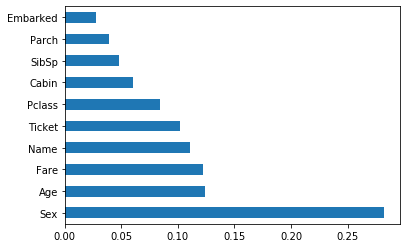

In [118]:
from sklearn.ensemble import ExtraTreesClassifier

X_train, X_test, y_train, y_test = train_test_split(
    df_train.drop('Survived',axis=1), 
    df_train['Survived'], 
    random_state=42)


model = ExtraTreesClassifier()
model.fit(X_train,y_train)

#use inbuilt class feature_importances of tree based classifiers
print(model.feature_importances_) 

#plot graph of feature importances
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

### Correlation Matrix with Heatmap

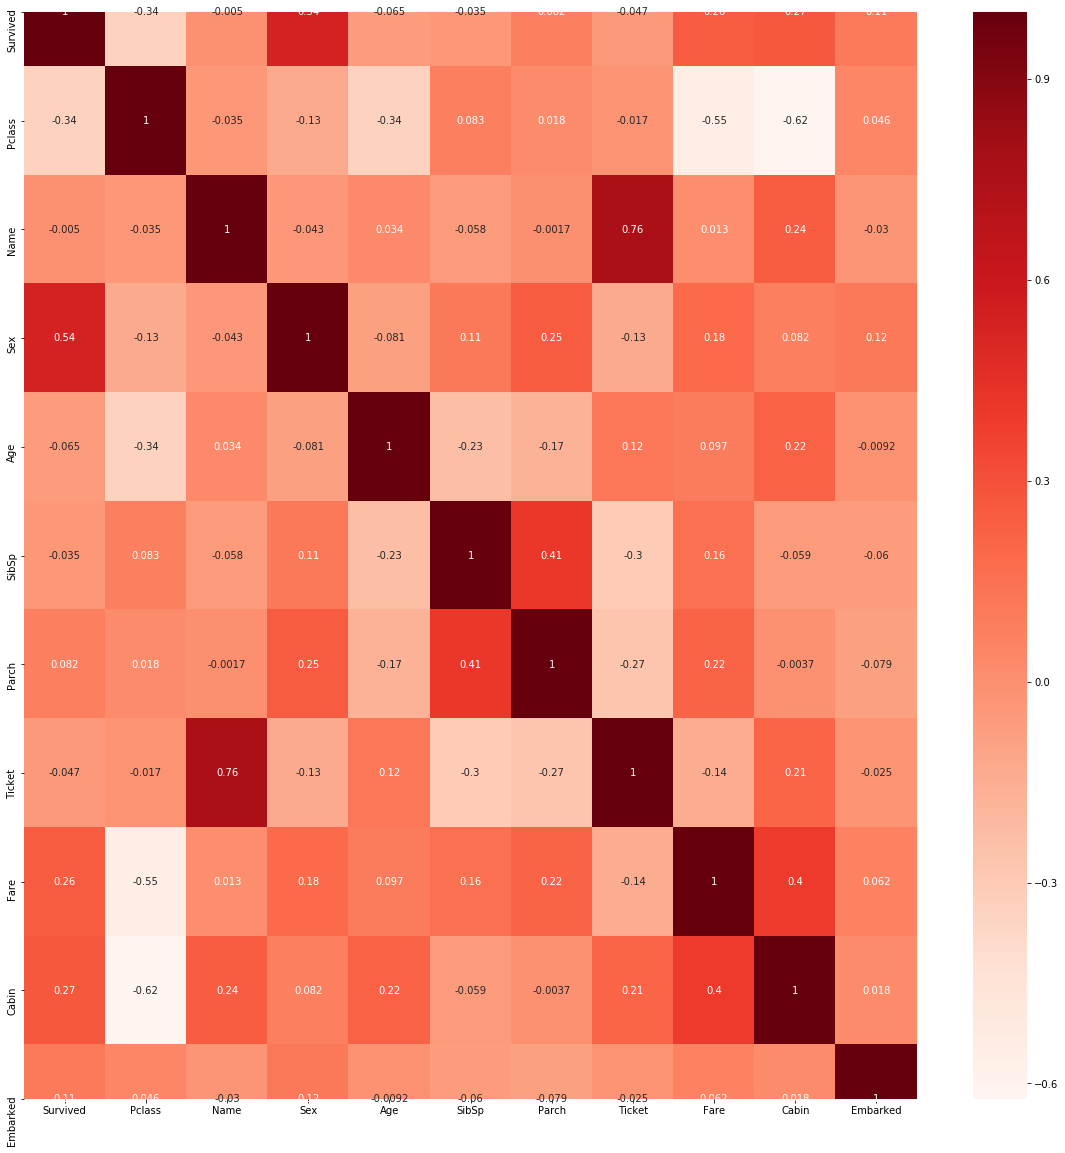

In [121]:
#get correlations of each features in dataset
corrmat = df_train.corr()
top_corr_features = corrmat.index

plt.figure(figsize=(20,20))

#plot heat map
g=sns.heatmap(df_train[top_corr_features].corr(),annot=True,cmap="Reds")

In [155]:
## Univariate Selection

Uses statistical tests to select those featuresm that have the strongest relationship with the output variable.


SyntaxError: invalid syntax (<ipython-input-155-6e174e50cede>, line 3)